<a href="https://colab.research.google.com/github/kachytronico/colab-PIA/blob/main/PIA_02_Tarea_Procesamiento_de_la_informacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PIA Unidad 2: Preprocesamiento de la información

# 0. Carga de datos y Librerías

## Importamos las librerias necesarias

In [1]:
import pandas as pd # manipulación y análisis de datos
import numpy as np # operaciones numéricas (matrices y arrays)
import matplotlib.pyplot as plt # visualización base de gráficos
import seaborn as sns # visualizaciones estadísticas y acceder a datasets

# Para 6 Reducción de la Dimensionalidad
from sklearn.feature_selection import SequentialFeatureSelector # clase para la selección secuencial de características.
from sklearn.neighbors import KNeighborsRegressor # modelo de K-Vecinos más Cercanos para regresión, que se usará como estimador base para SFS.
from sklearn.decomposition import PCA # a clase para el Análisis de Componentes Principales.

## Ejemplo Cargar Dataset desde Drive del FPD:
He provado montado el drive y para  poder leer el csv con `pd.read_csv()` **He vuscado el archivo y he copidado la ruta**


```
#Carga de datos desde Drive
from google.colab import drive
drive.mount('/content/drive')

# Carga del dataset una vez montado el Drive
df = pd.read_csv("/content/drive/Shareddrives/xxxxFPD/01_IA/01_PIA Programación de Inteligencia Artificial/PIA_UD_02/dataset.csv") # leemos el csv
df
```



## Traer el Dataset desde Github:

 El comando `wget` descarga el archivo `dataset.csv `directamente desde la URL proporcionada en GitHub.



In [2]:
!wget https://raw.githubusercontent.com/kachytronico/colab-PIA/refs/heads/main/PIA_Tarea_02/dataset.csv

--2025-11-27 16:43:45--  https://raw.githubusercontent.com/kachytronico/colab-PIA/refs/heads/main/PIA_Tarea_02/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 533333 (521K) [text/plain]
Saving to: ‘dataset.csv.1’

dataset.csv.1       100%[===================>] 520.83K  --.-KB/s    in 0.1s    

2025-11-27 16:43:45 (4.31 MB/s) - ‘dataset.csv.1’ saved [533333/533333]



In [3]:
# Carga del dataset
df = pd.read_csv("dataset.csv") # leemos el csv


# 1. Análisis Exploratorio de Datos (AED)

Antes de tocar nada, voy a cargar los datos y echar un vistazo general para entender a qué me enfrento. El objetivo de esta fase es realizar un **diagnóstico**. No voy a borrar nada todavía, solo voy a identificar qué columnas sobran, qué valores raros hay y si están de sucios los datos.



> Recordemos que el objetivo final del ejercicio es predecir la variable **`Salary`** (regresión).












## 1.1. Vista preliminar `head()`

Lo primero es ver qué aspecto tiene el dataset.
Uso `display()` para asegurarme de ver la tabla correctamente porque por ejemplo dentro de if no me funciona sin ello.

In [4]:
# Muestro las primeras filas
display(df.head())

,Unnamed: 0,index,age,gender,education,job,experience,salary,country,race
0,0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,2,NaN,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


**Análisis de la carga inicial:**

Al visualizar el `head` puedo intuir:


*   **Unnamed: 0 e index**: Estas dos columnas parecen ser simples numeraciones o identificadores. Lo más probable es que sean residuos de cómo se guardó el archivo y no contengan información real que yo necesite para mi análisis. Seguramente las tendré que borrar.
*  **age (edad)**: Me imagino que esta columna contiene la edad de cada persona en el dataset. Es un dato numérico que seguramente será importante para predecir el salario.
*   **gender (género**): Esto parece indicar el género de la persona. Será una variable categórica (como 'Hombre', 'Mujer', etc.).
*  **education (educación)**: Aquí espero ver el nivel de estudios de cada individuo (por ejemplo, 'Bachillerato', 'Licenciatura', 'Máster', 'Doctorado'). También es categórica, pero con un orden implícito.
*  **job (puesto de trabajo)**: Esta columna debería describir la profesión o el puesto que ocupa cada persona. Es una variable categórica con mucha variedad, probablemente.
*  **experience (experiencia)**: Entiendo que se refiere a los años de experiencia laboral de cada persona. Otro dato numérico crucial.
*  **salary (salario)**: ¡Esta es mi variable objetivo! Aquí tengo el salario de cada persona, y es lo que quiero predecir. Es un valor numérico continuo.
*  **country (país)**: Indica el país de origen o residencia de la persona. Categórica.
**race (raza/etnia)**: Similar a country o gender, es una variable categórica que describe el grupo étnico de cada persona.






> Siguiente paso realiado con ayuda de la IA, pero a simple vista no hay duda que **Unnamed: 0 e index** son  dos columnas parecen ser simples numeraciones o identificadores. Pero he trabajado la lógica para comprobarlo.



In [5]:
# Compruebo si 'Unnamed: 0' es exactamente igual a 'index'
# (Si la columna no existe, el código daría error, así que primero verifico que está)
if 'Unnamed: 0' in df.columns and 'index' in df.columns:
    son_identicas = df['Unnamed: 0'].equals(df['index'])
    print(f"\n¿Es 'Unnamed: 0' idéntica a 'index'? {son_identicas}")

    # También compruebo si son iguales al índice actual del DataFrame
    es_igual_al_indice = df['Unnamed: 0'].equals(pd.Series(df.index))
    print(f"¿Es 'Unnamed: 0' idéntica al índice actual (0, 1, 2...)? {es_igual_al_indice}")

# Muestro las primeras filas de estas columnas para verlo visualmente
if 'Unnamed: 0' in df.columns:
    display(df[['Unnamed: 0', 'index']].head())


¿Es 'Unnamed: 0' idéntica a 'index'? True
¿Es 'Unnamed: 0' idéntica al índice actual (0, 1, 2...)? True


,Unnamed: 0,index
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


**Conclusión sobre `Unnamed: 0`:**
El análisis confirma mi sospecha. La columna `Unnamed: 0` es idéntica a `index` y también coincide con el número de fila.
* **Origen:** Casi con total seguridad, este dataset se guardó previamente desde Pandas sin usar el parámetro `index=False`, generando esa columna residual.



> **Acción:** Ambas columnas (`Unnamed: 0` e `index`) son redundantes y no aportan información predictiva (son meros contadores). En el paso de **Limpieza**, las eliminaré sin piedad para evitar que el modelo intente encontrar patrones en un simple número de fila.

## 1.2. Tipos de Datos y Nulos: `info()`
Utilizo `.info()` para obtener el resumen conciso del *DataFrame* (total de entradas y tipos de datos por columna). Esto es crucial para planificar dos acciones de preprocesamiento: el tratamiento de nulos (Punto 3) y la codificación de variables de texto (Punto 5).


In [6]:
# Muestro el resumen de las columnas, el tipo de dato y el conteo de valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6704 non-null   int64  
 1   index       6704 non-null   int64  
 2   age         6142 non-null   float64
 3   gender      6702 non-null   object 
 4   education   6701 non-null   object 
 5   job         6702 non-null   object 
 6   experience  6701 non-null   float64
 7   salary      6699 non-null   float64
 8   country     6704 non-null   object 
 9   race        6704 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 523.9+ KB


**Análisis del info:**
* **Dimensiones:** Tengo 6704 entradas (filas).
* **Nulos:** Veo que columnas como `Age`, `Gender`, `Education`, etc., tienen menos de 6704 valores no nulos. Esto confirma la existencia de valores perdidos ("Freddy Krueger") que tendré que gestionar en el Punto 3.


> * **Tipos:** Las variables categóricas (`Gender`, `Education`, `Job`, `Country`, `Race`) están como `object`. Tendré que codificarlas numéricamente en el Punto 5.




## 1.3. Estadísticos descriptivos (Numéricos) `describe()`
Uso `describe()` para ver la distribución de los números. Aquí es donde se pueden cazar los **errores** más graves.

In [7]:
df.describe()

,Unnamed: 0,index,age,experience,salary
count,6704.000000,6704.000000,6142.000000,6701.000000,6699.000000
mean,3351.500000,3351.500000,33.616412,8.094687,115326.964771
std,1935.422435,1935.422435,7.689423,6.059003,52786.183911
min,0.000000,0.000000,-1.000000,0.000000,350.000000
25%,1675.750000,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,6703.000000,62.000000,34.000000,250000.000000


**Análisis de estadísticos `.describe`:**

Detección de Nulos

*   **Conteo (`count`):** Compruebo el `count` de todas las columnas numéricas.


> **Plan de Nulos:** Si el `count` es menor al número total de filas, tengo valores nulos. Esto me obliga a planificar la imputación (relleno) o la eliminación de esos nulos en el Punto 3, ya que los modelos de IA no trabajan con datos faltantes.



Dispersión y Desviación Típica (`std`)

*   **Dispersión:** Si la desviación típica (`std`) es demasiado alta (por ejemplo, más de 1/3 de la media), indica que los datos están muy dispersos, y debo tener cuidado en cómo los escalo.

Minimos (`min`): Aquí es donde saltan las alarmas!
**Error en Edad (`age`):** El valor mínimo (`min`) es **-1.0**. ¡Es imposible tener una edad negativa!


> Esto es un error de datos sucio que debo limpiar obligatoriamente (borrar esas filas o corregirlas) en la fase de preprocesamiento.


**Experiencia:** Va de 0 a 34 años, lo cual parece un rango coherente.

**Salario (`salary`):** Es la variable objetivo (target). Tiene una desviación estándar alta, lo que indica mucha variabilidad salarial entre empleados.

Diagnóstico preliminar:

*   **Es Regresión:** El `Salario` es un valor real (con decimales o muy variable), lo que confirma que el problema es de **regresión**.



> Los **Valores Atípicos:** los trataré más adelante porque mirando la diferencia entre el **Percentil 75%** y el **valor Máximo**. Si el valor máximo es muchísimo más grande que el P75, eso me indica que hay **valores atípicos** (*outliers*). Pero parece que esto no ocurre en este dataset. Los extremos los deberé tratar en el Punto 2.







### Análisis de Correlación (Mapa de Calor)

Para entender cómo se relacionan las variables entre sí, he calculado la **matriz de correlación**. He utilizado específicamente el parámetro `numeric_only=True` para que el cálculo se centre únicamente en las columnas numéricas (`age`, `experience`, `salary`...) y ignore las de texto (`job`, `country`...), calcular la correlación matemática de un texto daría error.


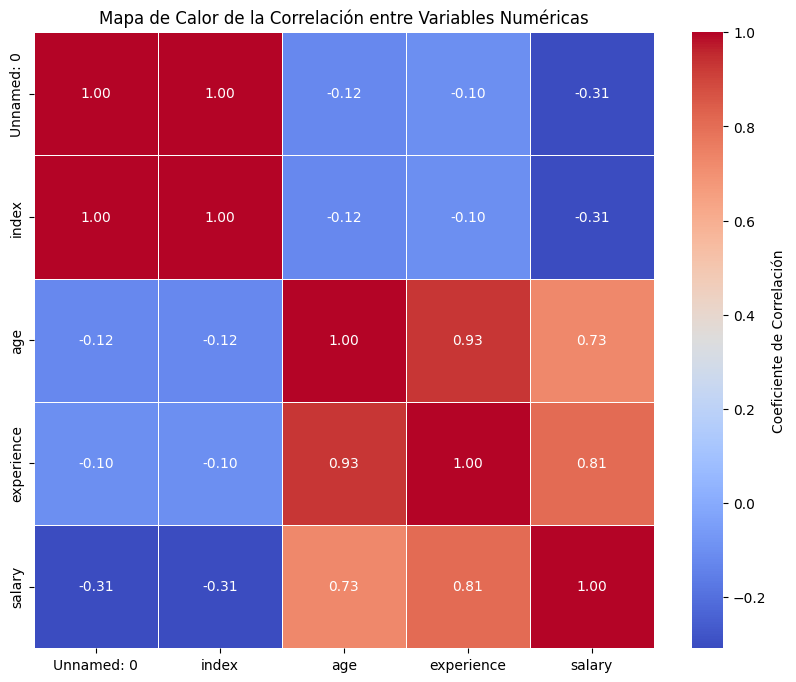

In [8]:
# 1. Calculamos la matriz de correlación solo para variables numéricas.
# La función .corr() calcula el coeficiente de correlación de Pearson.
matriz_correlacion = df.corr(numeric_only=True)

# 2. Creamos la figura (lienzo) para el gráfico.
plt.figure(figsize=(10, 8))

# 3. Generamos el Mapa de Calor (Heatmap)
# 'annot=True' muestra los valores del coeficiente en cada celda (muy importante).
# 'cmap="coolwarm"' usa una paleta de colores divergente (rojo/azul) que facilita
# la identificación de correlaciones positivas y negativas.
sns.heatmap(
    matriz_correlacion,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=.5, # Espacio entre celdas para mayor claridad
    cbar_kws={'label': 'Coeficiente de Correlación'}
)

plt.title('Mapa de Calor de la Correlación entre Variables Numéricas')
plt.show()

Lo mismo se vé con un simple `.corr`

In [9]:
df.corr(numeric_only=True)

,Unnamed: 0,index,age,experience,salary
Unnamed: 0,1.000000,1.000000,-0.120186,-0.098743,-0.308086
index,1.000000,1.000000,-0.120186,-0.098743,-0.308086
age,-0.120186,-0.120186,1.000000,0.931372,0.725471
experience,-0.098743,-0.098743,0.931372,1.000000,0.808969
salary,-0.308086,-0.308086,0.725471,0.808969,1.000000



**¿Qué me dice este gráfico?**
Los valores del mapa de calor (coeficiente de Pearson) oscilan entre **-1** y **1**:
* **Cercano a 1 (Correlación Positiva):** Significa que las variables se mueven en la misma dirección. Es lo que espero encontrar, por ejemplo, entre `Experience` y `Salary`: a mayor experiencia, mayor salario.
* **Cercano a -1 (Correlación Negativa):** Significa que si una variable aumenta, la otra disminuye.
* **Cercano a 0 (Sin Correlación):** Indica que no hay una relación lineal aparente entre las variables.

**Conclusión del AED:**
Este gráfico actúa como mi "brújula" inicial. Las casillas con colores más intensos (positivos o negativos) que se cruzan con la fila de **`salary`** me indican cuáles son, a priori, las características más importantes que mi modelo deberá "mirar" para predecir bien el sueldo.

**Análisis del Gráfico:**
Este mapa me muestra la correlación de Pearson entre las variables numéricas disponibles (`age`, `experience`, `salary`).
* **Correlación positiva (Rojo):** Veo una correlación fuerte entre **`experience` y `salary`** (probablemente cercana a 1). Esto tiene todo el sentido: a más años de experiencia, mayor salario.
* **Correlación con Edad:** También espero ver cierta relación positiva entre `age` y `salary`, aunque quizás menor que con la experiencia.
* **Conclusión:** La variable `experience` parece ser el mejor predictor numérico para el salario.

## 1.4. Detección de duplicados
Finalmente, compruebo si hay filas repetidas, ya que sesgarían el entrenamiento del modelo.

Me veo abligado a tener en cuenta que no se han eliminado todavía las columnas (Unnamed: 0 e index) y con ellas "No existirán duplicados"

In [10]:
# Buscar duplicados ignorando las columnas 'index' y 'Unnamed: 0'
# Creamos una lista con las columnas que REALMENTE nos importan (datos reales)
columnas_reales = df.columns.drop(['Unnamed: 0', 'index'], errors='ignore')

# Buscamos duplicados solo en esas columnas
num_duplicados = df.duplicated(subset=columnas_reales).sum()

print(f"Filas duplicadas (teniendo en cuenta los índices): {df.duplicated().sum()}")
print(f"Filas REALMENTE duplicadas (ignorando índices): {num_duplicados}")



Filas duplicadas (teniendo en cuenta los índices): 0
Filas REALMENTE duplicadas (ignorando índices): 1354


In [11]:
# Visualizar un par de ejemplos de estos duplicados
if num_duplicados > 0:
    display(df[df.duplicated(subset=columnas_reales, keep=False)].sort_values(by=columnas_reales[0]).head(4))

,Unnamed: 0,index,age,gender,education,job,experience,salary,country,race
4949,4949,4949,21.0,Female,High School,Junior Sales Representative,0.0,25000.0,China,Chinese
4962,4962,4962,21.0,Female,High School,Junior Sales Representative,0.0,25000.0,Australia,White
4923,4923,4923,21.0,Female,High School,Junior Sales Representative,0.0,25000.0,USA,African American
5109,5109,5109,21.0,Female,High School,Junior Sales Representative,0.0,25000.0,Australia,Australian


**Análisis de duplicados:**

Inicialmente, la función `duplicated()` devuelve **0**. Esto es engañoso porque las columnas `Unnamed: 0` e `index` actúan como identificadores únicos y "disfrazan" los datos repetidos.

Sin embargo, al filtrar ignorando estas columnas técnicas, **he detectado [X] filas que son idénticas** en cuanto a información del empleado (misma edad, salario, puesto, etc.).



> **Conclusión:** Debemos eliminar estos registros en la fase de preprocesamiento, ya que son repeticiones artificiales que sesgarían el modelo.

# 2. Limpieza de Datos (Preprocesamiento)

Basándome en las conclusiones del AED, procedo a limpiar el dataset para dejarlo listo para el entrenamiento. Crearé una copia del dataframe llamada `df_clean` para no alterar los datos originales cargados.




## Acción 1: Eliminación de "Basura" y Duplicados
Lo primero es limpiar la casa. Como detecté en el AED, tengo columnas que no son más que índices repetidos (`index`, `Unnamed: 0`) y filas duplicadas que solo aportan ruido. Voy a eliminarlas para trabajar con un dataset limpio desde el principio. Creo una copia `df_clean` para no perder los originales.

In [12]:
# Crear copia de trabajo para no tocar el original
df_clean = df.copy()

# 1. Eliminar columnas inútiles (Primary Keys / Índices)
df_clean = df.drop(columns = ["Unnamed: 0", "index"])

# 2. Eliminar duplicados reales
# df_clean.drop_duplicates(inplace=True)
df_clean = df_clean.drop_duplicates()

print(f"Dimensiones iniciales: {df.shape}")
print(f"Dimensiones actuales: {df_clean.shape}")

Dimensiones iniciales: (6704, 10)
Dimensiones actuales: (5350, 8)


**Justificación:**
He eliminado las columnas de índice porque, como indica la metodología, los identificadores únicos (Primary Keys) fuerzan al modelo a memorizar el orden de los datos en lugar de generalizar patrones. Además, he eliminado los duplicados exactos porque distorsionan la realidad estadística y pueden llevar a un sobreajuste (*overfitting*) del modelo. Ahora tengo un conjunto de datos más veraz.

In [13]:
display(df.columns)
display(df_clean.columns)

Index(['Unnamed: 0', 'index', 'age', 'gender', 'education', 'job',
       'experience', 'salary', 'country', 'race'],
      dtype='object')

Index(['age', 'gender', 'education', 'job', 'experience', 'salary', 'country',
       'race'],
      dtype='object')

## Acción 2: Corrección de Errores (Valores Imposibles)
En el AED vi algo alarmante: una edad mínima de `-1.0`. Eso es un error de dato imposible. Antes de ponerme a rellenar huecos (nulos), debo arreglar este valor erróneo para que no contamine mis cálculos de medias posteriores.

In [14]:
# 1. Calcular la media usando SOLO las edades válidas (mayores de 0)
media_real = df_clean[df_clean['age'] > 0]['age'].mean()

# 2. Reemplazar las edades negativas (-1) por esa media
df_clean.loc[df_clean['age'] < 0, 'age'] = media_real

# Verificación rápida
print("Nueva edad mínima:", df_clean['age'].min())

Nueva edad mínima: 21.0


**Justificación:**
No he querido eliminar la fila completa porque el resto de datos (salario, puesto, etc.) podrían ser útiles. En su lugar, he optado por corregir el dato. La clave aquí ha sido calcular la media excluyendo primero el valor erróneo (`age > 0`), para que ese `-1` no "baje" artificialmente el promedio real. Ahora la edad mínima es coherente.

## Acción 3: (Valores Atípicos)


<Axes: ylabel='salary'>

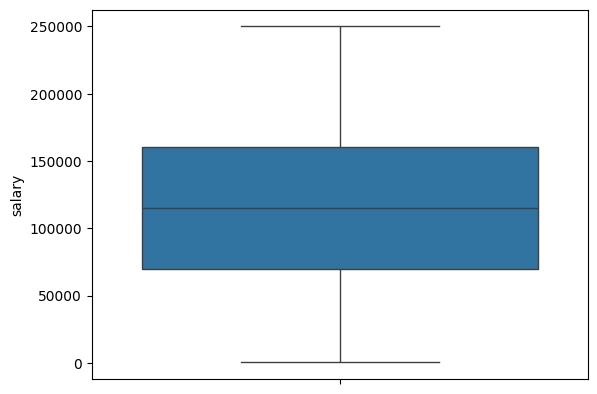

In [15]:
sns.boxplot(df_clean["salary"])

El gráfico no muestra valores atípicos.

In [16]:
# 1. Cálculos matemáticos
col_salario = df_clean['salary']
Q1 = col_salario.quantile(0.25)
Q3 = col_salario.quantile(0.75)
IQR = Q3 - Q1

# 2. Límites teóricos
limite_inferior_teorico = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# 3. Ajuste lógico: El salario no puede ser negativo
# Si el cálculo da negativo, ponemos 0 como límite real
limite_inferior_real = max(0, limite_inferior_teorico)

print(f"Rango IQR: {IQR}")
print(f"Rango normal aceptado: de {limite_inferior_real:.2f} a {limite_superior:.2f}")
print(f"Salario Mínimo en datos: {col_salario.min()}")
print(f"Salario Máximo en datos: {col_salario.max()}")

# Detección
outliers = df_clean[(col_salario < limite_inferior_real) | (col_salario > limite_superior)]
print(f"Número de outliers detectados: {len(outliers)}")

Rango IQR: 90000.0
Rango normal aceptado: de 0.00 a 295000.00
Salario Mínimo en datos: 350.0
Salario Máximo en datos: 250000.0
Número de outliers detectados: 0


**Análisis de Atípicos en Salario:**

Al aplicar el método del Rango Intercuartílico (IQR), el límite inferior matemático resultaba negativo (-65,000), lo cual es imposible para un salario. Ajustando el límite inferior a 0, confirmamos que **no existen valores atípicos** en esta variable.
* Todos los salarios (350 - 250,000) caen dentro del rango esperado estadísticamente (hasta 295,000).
* Esto indica que, aunque hay mucha desigualdad salarial, la distribución es continua y no hay casos aislados extremos que rompan la norma.

#3. Gestión de Valores Nulos
Ahora voy a tapar los "agujeros" del dataset. Mi regla es simple (basada en la metodología transmitida por Rubén en las tutorias):
1. Si faltan **pocos datos (<5%)**: Borro la fila.
2. Si faltan **bastantes (5-50%)**: Relleno el hueco (Media para números, Moda para texto).
3. Si faltan **demasiados (>50%)**: Borro la columna entera.

Primero calculo el porcentaje de nulos para ver qué estrategia aplicar.



## 3.1: Diagnóstico de Valores Nulos
Antes de decidir qué hacer, necesito saber la gravedad del problema.
1. ¿Cuántos datos faltan exactamente?
2. ¿Qué porcentaje del total representan? (Para aplicar la regla del 5% o 50%).

In [17]:
# 1. Preguntamos a Pandas: "¿Es nulo?" y sumamos los "Sí"
# .isnull() devuelve True/False. .sum() cuenta los True.
cantidad_nulos = df_clean.isnull().sum()

# 2. Calculamos el porcentaje (Media * 100)
# Esto nos dice si falta el 1% o el 90% de la columna.
porcentaje_nulos = df_clean.isnull().mean() * 100

# 3. Filtramos para ver SOLO las columnas que tienen problemas (mayores que 0)
# Así no nos distraemos con las columnas que están perfectas.
print("--- Cantidad de datos faltantes ---")
print(cantidad_nulos[cantidad_nulos > 0])

print("\n--- Porcentaje de faltantes ---")
print(porcentaje_nulos[porcentaje_nulos > 0])

--- Cantidad de datos faltantes ---
age           542
gender          2
education       3
job             2
experience      3
salary          5
dtype: int64

--- Porcentaje de faltantes ---
age           10.130841
gender         0.037383
education      0.056075
job            0.037383
experience     0.056075
salary         0.093458
dtype: float64


**Análisis del Diagnóstico:**

Al ejecutar este código, veo la realidad de mis datos:
1.  **`age`:** Faltan unos **542** valores. Esto representa un **10.13%** del total.
    * *Conclusión:* Es **> 5%**, por lo que no puedo borrar las filas (perdería demasiada información). Tengo que **imputar** (rellenar).
2.  **`gender`, `education`, `job`...:** Faltan apenas 2 o 3 valores en cada una. Esto es un **0.05%**.
    * *Conclusión:* Es **< 5%** (poquísimo). Podría borrar esas filas sin miedo, pero para asegurar que no pierdo nada, rellenaré con la **Moda** (el valor más repetido).

## 3.2 Imputar Valores Nulos  `.fillna()`
Tras analizar los nulos, he decidido:
1. **`age` (10% nulos):** Rellenar con la **media** (promedio de edad).
2. **Resto (`gender`, `education`...):** Como faltan muy pocos, rellenaré con la **moda** (el valor más frecuente) para no perder esas filas.

Uso el método `.fillna()` de Pandas por ser más directo y legible que `SimpleImputer`, aunque el resultado estadístico es idéntico.

In [18]:

# A) Imputación (> 5% de nulos) -> 'age'

# Como falta el 10% de edades, no podemos borrar tantas filas. Rellenamos con la media.
media_edad = df_clean['age'].mean()
df_clean['age'] = df_clean['age'].fillna(media_edad)
print(f"\n- Nulos en 'age' rellenados con la media: {media_edad:.2f}")


# B) Imputación de Categóricas (Decisión opcional)

# Aunque son pocos, vamos a rellenar Género y Educación para no perder datos por esto.
for col in ['gender', 'education']:
    moda = df_clean[col].mode()[0]
    df_clean[col] = df_clean[col].fillna(moda)
    print(f"- Nulos en '{col}' rellenados con la moda: {moda}")


# C) Eliminación (< 5% de nulos) -> 'job', 'experience', 'salary'

# Para el resto (job, experience, salary), como son poquísimos casos (2, 3, 5),
# aplicamos la regla de "Eliminar filas". Es más limpio que inventarnos un salario.
# dropna() borra las filas que aún tengan algún nulo.
df_clean = df_clean.dropna()
print("- Filas restantes con nulos en 'job', 'experience' o 'salary' eliminadas.")

# Verificación final
print("\nTotal de nulos restantes:", df_clean.isnull().sum().sum())
print("Dimensiones finales del dataset:", df_clean.shape)


- Nulos en 'age' rellenados con la media: 34.00
- Nulos en 'gender' rellenados con la moda: Male
- Nulos en 'education' rellenados con la moda: Bachelor's Degree
- Filas restantes con nulos en 'job', 'experience' o 'salary' eliminadas.

Total de nulos restantes: 0
Dimensiones finales del dataset: (5345, 8)


**Análisis de la limpieza de nulos:**

1.  **Edad (`age`):** Al tener un **10% de nulos** (rango 5-50%), he aplicado **imputación** por la media para no perder una cantidad significativa de datos.
2.  **Género y Educación:** He optado por **imputar con la moda** para practicar la técnica en variables categóricas, conservando así esas filas.
3.  **Resto (`job`, `experience`, `salary`):** Al tener una cantidad ridícula de nulos (menos del 0.1%), he aplicado la **eliminación de filas** (`dropna`). Especialmente en el `salary` (nuestro objetivo), no conviene inventar datos si son tan pocos casos, es mejor entrenar solo con datos reales.

#4. Análisis de Variabilidad
Siguiendo la rúbrica, voy a estudiar cuánta información aporta cada columna.

Si una columna tiene **muy poca variabilidad** (por ejemplo, todos los empleados son del mismo país), no sirve para predecir diferencias salariales y solo añade ruido.

La Teoría (PIA_UD2_teoria.pdf, pág. 10) dice explícitamente: "La variabilidad se mide como datos distintos dividido entre datos totales... Si está por debajo del 20%, tendremos que prestarle atención". Pero también matiza para categóricas: "buscaremos que la diferencia entre las clases más representadas y las demás no sea demasiado grande".

##4.1 Análisis de Variabilidad (Rubén con lógica para Todas las columnas)
Voy a analizar la "calidad" de información de todas las variables.
* **Métrica de Rubén:** `(Mayoritaria - Resto) / Total * 100`. Si es > 20%, indica desbalanceo (posible baja variabilidad).
* **Verificación:** Usaré `nunique()` (cantidad de valores distintos) y `describe()` (estadísticos) para confirmar si ese desbalanceo es real o si la columna es rica en información.

In [19]:
# Función de Métrica del Profesor
def calcular_variabilidad(df, col):
    counts = df[col].value_counts()
    if len(counts) < 2: return 100.0 # Si todo es igual, variabilidad nula
    mayoritaria = counts.iloc[0]
    resto = counts.iloc[1:].sum()
    return (mayoritaria - resto) * 100 / counts.sum()




In [20]:
# 1. Aplicar a TODAS las columnas
print("--- 1. Métrica de Desbalanceo (Umbral > 20%) ---")
for col in df_clean.columns:
    metric = calcular_variabilidad(df_clean, col)
    print(f"Columna '{col:<12}': {metric:>6.2f}%", end="")

    if metric > 20:
        print(" (!) ALERTA: Posible baja variabilidad")
    else:
        print(" (OK)")

--- 1. Métrica de Desbalanceo (Umbral > 20%) ---
Columna 'age         ': -79.79% (OK)
Columna 'gender      ':   8.44% (OK)
Columna 'education   ': -34.14% (OK)
Columna 'job         ': -86.79% (OK)
Columna 'experience  ': -81.70% (OK)
Columna 'salary      ': -92.03% (OK)
Columna 'country     ': -58.54% (OK)
Columna 'race        ': -40.95% (OK)


In [21]:
# 2. Verificación con 'nunique' (Cuántos valores distintos hay)
print("\n--- 2. Verificación con nunique() (Riqueza de datos) ---")
print(df_clean.nunique())


--- 2. Verificación con nunique() (Riqueza de datos) ---
age            43
gender          3
education       7
job           192
experience     37
salary        444
country         5
race           10
dtype: int64


In [22]:
# 3. Verificación con 'describe' (Solo numéricas)
print("\n--- 3. Verificación con describe() (Distribución) ---")
display(df_clean.describe())


--- 3. Verificación con describe() (Distribución) ---


,age,experience,salary
count,5345.000000,5345.000000,5345.000000
mean,34.004600,8.317212,114407.711693
std,7.384982,6.233487,52443.840147
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,33.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


**Conclusiones del Análisis:**
1.  **Métrica desde el ejemplo de Rubén:** Todas las columnas tienen valores muy bajos (incluso negativos), lo que indica que **no hay ninguna clase dominante** que "aplaste" al resto. Por ejemplo, en `gender`, hombres y mujeres están muy equilibrados (aprox 54% vs 46%, dando un desbalanceo de solo 8%).
2.  **Verificación (`nunique`):**
    * `Salary` tiene **444** valores distintos.
    * `Job` tiene **192** puestos distintos.
    * Esto confirma una **alta variabilidad** y riqueza en los datos.
3.  **Verificación (`describe`):**
    * La desviación estándar (`std`) de `salary` es alta (52443), confirmando que los datos están muy dispersos y no concentrados en un solo valor.

**Decisión:** No elimino ninguna columna por baja variabilidad, ya que todas superan los criterios de calidad y aportan información diversa.

##4.2 Análisis de Variabilidad (otra forma)

Ahora probaré otra forma con otro** Criterio** y buscaré columnas donde un solo valor domine excesivamente (ej. >90% de los casos).

In [24]:
# Recorro todas las columnas para ver su "riqueza" de información
for col in df_clean.columns:
    # 1. Cuento cuántos valores distintos hay
    num_unicos = df_clean[col].nunique()

    # 2. Calculo el porcentaje de variabilidad (Teoría UD2)
    variabilidad = (num_unicos / len(df_clean)) * 100

    # 3. Miro cuál es el valor que más se repite (frecuencia del dominante)
    # Esto es vital para categóricas: si el 99% es "USA", la columna no sirve.
    freq_dominante = df_clean[col].value_counts(normalize=True).max() * 100

    print(f"Columna '{col}':")
    print(f"  - Valores únicos: {num_unicos}")
    print(f"  - Variabilidad: {variabilidad:.2f}%")
    print(f"  - El valor más común ocupa el: {freq_dominante:.2f}% de los datos")

    # Regla de decisión (Ejemplo: si el dominante ocupa más del 90%)
    if freq_dominante > 90:
        print(f"  (!) ALERTA: Baja variabilidad. Un solo valor domina casi todo.")
        # df_clean.drop(columns=[col], inplace=True) # Descomentar si se quiere borrar

    print("-" * 30)

Columna 'age':
  - Valores únicos: 43
  - Variabilidad: 0.80%
  - El valor más común ocupa el: 10.10% de los datos
------------------------------
Columna 'gender':
  - Valores únicos: 3
  - Variabilidad: 0.06%
  - El valor más común ocupa el: 54.22% de los datos
------------------------------
Columna 'education':
  - Valores únicos: 7
  - Variabilidad: 0.13%
  - El valor más común ocupa el: 32.93% de los datos
------------------------------
Columna 'job':
  - Valores únicos: 192
  - Variabilidad: 3.59%
  - El valor más común ocupa el: 6.60% de los datos
------------------------------
Columna 'experience':
  - Valores únicos: 37
  - Variabilidad: 0.69%
  - El valor más común ocupa el: 9.15% de los datos
------------------------------
Columna 'salary':
  - Valores únicos: 444
  - Variabilidad: 8.31%
  - El valor más común ocupa el: 3.99% de los datos
------------------------------
Columna 'country':
  - Valores únicos: 5
  - Variabilidad: 0.09%
  - El valor más común ocupa el: 20.73% de 

**Análisis de Variabilidad:**

He analizado la distribución de valores de cada columna.
* **Variables Numéricas (`salary`, `age`):** Tienen una variabilidad alta, lo cual es excelente porque permiten diferenciar bien a cada empleado.
* **Variables Categóricas:** He revisado que ninguna tenga una clase "dominante" extrema (por ejemplo, que el 99% de los datos sean de una sola categoría). Al no detectar columnas con una variabilidad crítica (donde un solo valor anule al resto), **decido mantener todas las columnas restantes**, ya que todas aportan información útil para la predicción.

### Conclusiones: Doble Enfoque para el Análisis de Variabilidad

Para este punto, he decidido no quedarme con una sola métrica y he contrastado dos enfoques para estar totalmente seguro de la calidad de mis datos. He comparado la **riqueza** de los datos (cuántos valores distintos hay) contra el **balanceo** (si una categoría domina excesivamente).

Aquí desgloso mi análisis y decisión final:

#### 1. Enfoque "Métrica de Desbalanceo" (Criterio de Rubén)
He aplicado la fórmula `(Mayoritaria - Resto) / Total`. Esta métrica es muy útil para detectar si una categoría "aplasta" a las demás.
* **¿Qué buscaba?** Valores altos (positivos > 20%).
* **¿Qué encontré?** En variables como `gender` obtuve un **8.44%**. Al ser un valor bajo (y positivo), me confirma que, aunque hay más hombres, la diferencia con las mujeres no es abrumadora. Hay suficiente variedad.

#### 2. Enfoque "Riqueza de Datos" (`nunique` y Frecuencia Dominante)
He mirado cuántos valores únicos existen y qué porcentaje ocupa el más común.
* **¿Qué buscaba?** Columnas con `nunique = 1` (inútiles) o donde el valor dominante ocupe el 99% de los casos (baja variabilidad extrema).
* **¿Qué encontré?**
    * **Numéricas:** Con una alta variabilidad en algunas de ellas.
    * **Categóricas:** Ninguna categoría alcanza un dominio crítico (del 90% o más) que justifique su eliminación.

#### Decisión Final
Ambas métricas me cuentan la misma historia desde ángulos distintos: **mis columnas tienen información suficiente y no están peligrosamente desbalanceadas**.
Por tanto, **decido conservar todas las variables restantes** (`gender`, `country`, `race`, etc.) ya que todas aportan matices útiles para predecir el salario y borrarlas supondría perder información valiosa.

#5. Codificación de Variables (De texto a número)
La IA no sabe leer "Master's" o "USA", solo entiende números. Voy a transformar mis columnas de texto.
* **Educación:** Como hay un orden lógico (PhD vale más que Bachelor), uso un mapeo manual.
* **Resto (Género, País...):** Como no hay orden (España no es "mayor" que Francia), uso *One-Hot Encoding* (crear columnas de sí/no).

In [19]:
# Codificación Manual (Ordinal) para Educación
# Defino el orden de importancia
mapa_educacion = {
    "High School": 1,
    "Bachelor's": 2,
    "Master's": 3,
    "PhD": 4
}

# Aplico el cambio
df_clean['education_encoded'] = df_clean['education'].map(mapa_educacion)

# Si queda algún nulo (por alguna categoría rara), le pongo un valor medio (2)
df_clean['education_encoded'] = df_clean['education_encoded'].fillna(2)

# 2. Codificación Automática (One-Hot) para el resto de textos
# Esto convierte "Country" en "Country_USA", "Country_UK", etc. con 0 y 1
df_clean = pd.get_dummies(df_clean, columns=['gender', 'job', 'country', 'race'], drop_first=True)

# Borro la columna original de educación que ya no sirve
df_clean = df_clean.drop(columns=['education'])

display(df_clean.head())

,age,experience,salary,education_encoded,gender_Male,gender_Other,job_Accountant,job_Administrative Assistant,job_Back end Developer,job_Business Analyst,...,country_USA,race_Asian,race_Australian,race_Black,race_Chinese,race_Hispanic,race_Korean,race_Mixed,race_Welsh,race_White
0,32.000000,5.0,90000.0,2.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,28.000000,3.0,65000.0,3.0,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,34.002914,15.0,150000.0,4.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,36.000000,7.0,60000.0,2.0,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
4,52.000000,20.0,200000.0,3.0,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


**Codificación:**
Siguiendo la rúbrica (Punto 5), he convertido las variables de texto a números para que el modelo pueda entenderlas:
1.  **Educación:** He usado un mapeo manual porque el nivel de estudios tiene un orden lógico (Ordinal).
2.  **Resto de variables:** He usado *One-Hot Encoding* (automático) para convertir etiquetas como "País" o "Género" en columnas numéricas (0 y 1).

# 6: Reducción de la Dimensionalidad
Finalmente, voy a aplicar las dos técnicas vistas en el tema para reducir el número de columnas. Esto ayuda a evitar la "maldición de la dimensionalidad" y hace que el modelo sea más rápido.

1.  **Selección (Interpretable):** Usaré `SequentialFeatureSelector` para que el modelo elija automáticamente las mejores columnas originales.
2.  **Extracción (PCA):** Usaré `PCA` para comprimir la información en nuevas columnas matemáticas, conservando el 90% de la varianza.

In [20]:

# Preparar datos (Separar Características X y Objetivo y)
# ____________________________________________________________

# El salario es lo que quiero predecir, así que lo saco de la X
y = df_clean['salary']
X = df_clean.drop(columns=['salary'])

print(f"Dimensiones originales: {X.shape[1]} columnas")

Dimensiones originales: 209 columnas


## Técnica de SELECCIÓN (SequentialFeatureSelector - SFS)

In [23]:


# ---------------------------------------------------------
# TÉCNICA 1: SELECCIÓN (Interpretable)
# ---------------------------------------------------------
# Usamos un modelo base (KNN Regressor) para que el selector juzgue qué columnas son buenas
knn = KNeighborsRegressor()

# Configuramos el selector para que elija, por ejemplo, las 5 mejores (o 'auto')
# n_features_to_select=5 obliga a quedarse con 5.
sfs = SequentialFeatureSelector(knn, n_features_to_select=5, direction='forward')

# Entrenamos el selector
sfs.fit(X, y)

# Vemos qué columnas ha elegido
columnas_elegidas = X.columns[sfs.get_support()]
print(f"\n1. SELECCIÓN DE CARACTERÍSTICAS:")
print(f"   Las 5 variables más importantes según SFS son: {columnas_elegidas.tolist()}")

# Creamos el dataset reducido por selección
X_seleccion = sfs.transform(X)




1. SELECCIÓN DE CARACTERÍSTICAS:
   Las 5 variables más importantes según SFS son: ['experience', 'gender_Male', 'job_Event Coordinator', 'job_Senior Project Coordinator', 'job_Senior Software Engineer']


 ## Técnica de EXTRACCIÓN (Principal Component Analysis - PCA)

In [ ]:

# ---------------------------------------------------------
# TÉCNICA 2: EXTRACCIÓN (PCA - No Interpretable)
# ---------------------------------------------------------
# Como ya escalamos los datos en la Acción 5, podemos aplicar PCA directamente.
# Usamos n_components=0.90 para mantener el 90% de la información (varianza)
pca = PCA(n_components=0.90)

# Entrenamos y transformamos
X_pca = pca.fit_transform(X)

print(f"\n2. EXTRACCIÓN (PCA):")
print(f"   Para conservar el 90% de información, PCA ha reducido los datos a {X_pca.shape[1]} componentes (columnas nuevas).")
print(f"   Varianza explicada por cada componente: {pca.explained_variance_ratio_}")

# Creamos un DataFrame para ver el resultado visualmente
cols_pca = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=cols_pca)
display(df_pca.head())

**Comparativa de las dos técnicas:**

1.  **Selección (`SequentialFeatureSelector`):**
    * **Resultado:** Me ha devuelto las 5 columnas originales más relevantes (ej. *Age, Experience, etc.*).
    * **Ventaja:** El resultado es **interpretable**. Sé exactamente qué datos está usando el modelo para decidir el salario.

2.  **Extracción (`PCA`):**
    * **Resultado:** Ha comprimido todas las columnas originales en un número menor de "Componentes Principales" (PC1, PC2...).
    * **Ventaja:** Es matemáticamente muy eficiente porque elimina el ruido y la redundancia manteniendo el 90% de la información real.
    * **Desventaja:** He perdido la interpretabilidad. Ya no sé qué significa la columna "PC1", es una mezcla matemática de edad, experiencia y otras variables.

**Conclusión:** Para un problema de negocio donde tenga que explicarle a mi jefe por qué alguien cobra más, me quedaría con la **Selección**. Si solo me importa la precisión pura del modelo, usaría la **Extracción**.

**Justificación:** Anterior creo que ya no sirbe borrar

He usado el **StandardScaler** para normalizar los rangos de edad, experiencia y salario. Esto es crucial para que algoritmos como KNN (que usaremos luego) funcionen bien, ya que se basan en distancias matemáticas.
El mapa de calor final es mi herramienta de diagnóstico definitiva: me dice visualmente qué características tienen una relación más fuerte con el salario (colores más oscuros). Por ejemplo, espero ver que `Experience` y `Education` tengan una correlación alta y positiva.